In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [2]:
class KNNClassifier:
    def __init__(self, k):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
            nearest_indices = np.argsort(distances)[:self.k]
            nearest_labels = self.y_train[nearest_indices]
            unique_labels, counts = np.unique(nearest_labels, return_counts=True)
            y_pred.append(unique_labels[np.argmax(counts)])
        return np.array(y_pred)


def custom_kfold(X, y, n_splits):
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    fold_size = len(X) // n_splits
    for i in range(0, len(X), fold_size):
        test_indices = indices[i:i+fold_size]
        train_indices = np.concatenate((indices[:i], indices[i+fold_size:]))
        yield train_indices, test_indices

In [3]:
iris = load_iris()
X = iris.data
y = iris.target

In [13]:
k_values = list(range(1, 31))

n_splits = 5
test_accuracies = []

for k in k_values:
    fold_accuracies = []
    for train_index, test_index in custom_kfold(X, y, n_splits):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        knn = KNNClassifier(k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        fold_accuracies.append(accuracy)

    test_accuracies.append(np.mean(fold_accuracies))

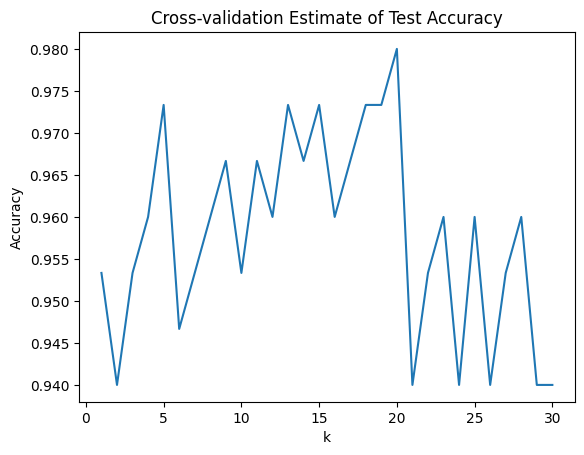

In [14]:
plt.plot(k_values, test_accuracies)
plt.title('Cross-validation Estimate of Test Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

In [15]:
best_k = k_values[np.argmax(test_accuracies)]
print("Best k:", best_k)

Best k: 20


In [16]:
for fold, accuracy in enumerate(fold_accuracies, 1):
    print(f"Test error on fold {fold}: {1 - accuracy}")

Test error on fold 1: 0.0
Test error on fold 2: 0.06666666666666665
Test error on fold 3: 0.06666666666666665
Test error on fold 4: 0.1333333333333333
Test error on fold 5: 0.033333333333333326


In [17]:
final_knn = KNNClassifier(best_k)
final_knn.fit(X, y)

final_y_pred = final_knn.predict(X)
final_accuracy = accuracy_score(y, final_y_pred)
print("Estimated test error of final predictor:", 1 - final_accuracy)

Estimated test error of final predictor: 0.020000000000000018
